# Tecnológico de Costa Rica
## Programa de Ciencia de datos
### Aprendizaje Automático
#### Prof. MSc. Felipe Meza

#### Autor: Erick Salas Chaverri

#### Objetivo: Elección de un conjunto de datos no trivial de baja complejidad para aplicarle 3 algoritmos supervisados

#### Importación de bibliotecas

In [126]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats
import pylab as pl
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Obtención de datos.
#### Métricas de dimensiones de diversas frutas

In [7]:
df_frutas = pd.read_table('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt')
df_frutas.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Se tiene un dataframe con la masa, anchura, altura y una cuantificación del color

Se tiene un dataframe de 59 filas y 7 columnas

In [175]:
df_frutas.shape

(59, 7)

##### La descripción de las columnas con valores numéricos

In [8]:
df_frutas.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [105]:
columnas_lista = df_frutas.columns.tolist()
columnas_lista

['etiqueta_fruta',
 'nombre_fruta',
 'subtipo_fruta',
 'masa_fruta',
 'ancho_fruta',
 'altura_fruta',
 'puntaje_color']

In [11]:
df_frutas.rename(columns={
 'fruit_label': 'etiqueta_fruta',
 'fruit_name': 'nombre_fruta',
 'fruit_subtype': 'subtipo_fruta',
 'mass': 'masa_fruta',
 'width' : 'ancho_fruta',
 'height': 'altura_fruta',
 'color_score': 'puntaje_color'
}, inplace=True)

In [48]:
df_frutas.dtypes

etiqueta_fruta      int64
nombre_fruta       object
subtipo_fruta      object
masa_fruta          int64
ancho_fruta       float64
altura_fruta      float64
puntaje_color     float64
dtype: object

In [52]:
df_frutas.masa_fruta = df_frutas.masa_fruta.astype('float64')

In [53]:
df_frutas.head()

,etiqueta_fruta,nombre_fruta,subtipo_fruta,masa_fruta,ancho_fruta,altura_fruta,puntaje_color
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


### Son 4 frutas distintas

In [17]:
df_frutas.nombre_fruta.nunique()

4

In [106]:
frutas_lista = df_frutas.nombre_fruta.unique().tolist()
frutas_lista

['apple', 'mandarin', 'orange', 'lemon']

#### El dataset está ligeramente balanceado, excepto para el caso de la mandarina

In [19]:
df_frutas.groupby('nombre_fruta').size()

nombre_fruta
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

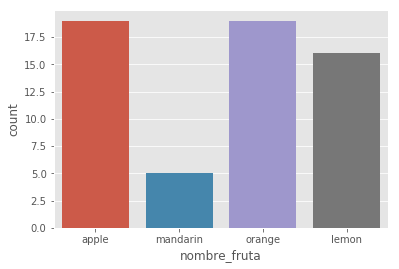

In [181]:
sns.countplot(df_frutas['nombre_fruta'],label="Número de Frutas")

### Distribución de los valores.
Con los diagramas de caja 'box' se puede apreciar que los valores están distribuidas en una forma casi normal o Gausiana

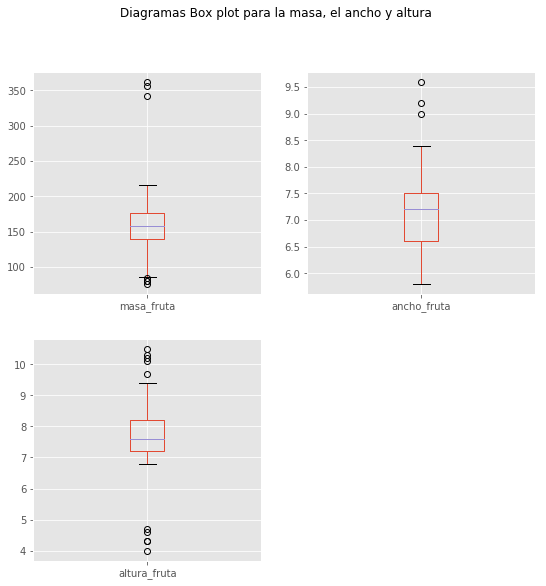

In [180]:
df_frutas.drop(['etiqueta_fruta', 'puntaje_color'], axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Diagramas Box plot para la masa, el ancho y altura')
plt.show()

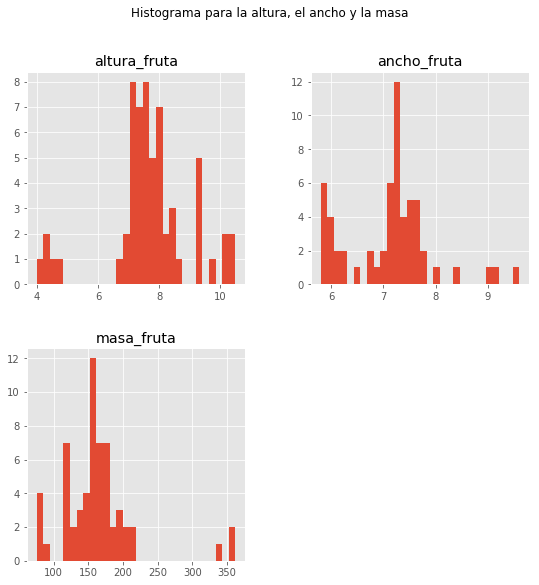

In [179]:
df_frutas.drop(['etiqueta_fruta', 'puntaje_color'] ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histograma para la altura, el ancho y la masa")
plt.show()

Text(0.5, 0.98, 'Matriz de correlación para cada variable')

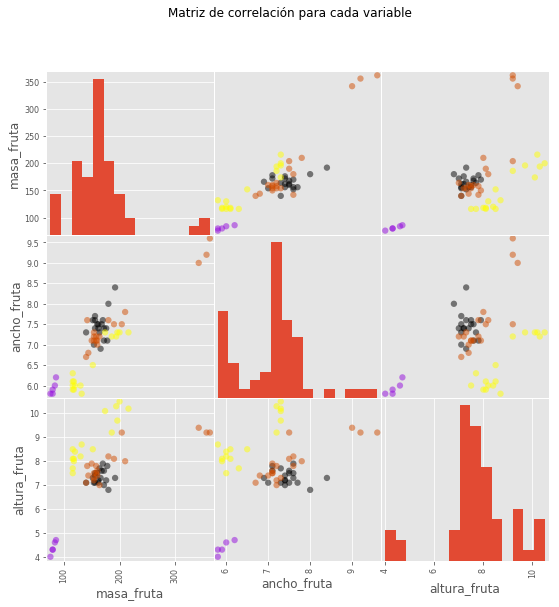

In [182]:
feature_names = ['masa_fruta', 'ancho_fruta', 'altura_fruta']
features_df = df_frutas[feature_names]
label_df = df_frutas['etiqueta_fruta']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(features_df, c = label_df, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap, grid=True)
plt.suptitle('Matriz de correlación para cada variable')

# Observación

Se nota una fuerte correlación entre la masa y la anchura de las frutas. Más arriba que la relación que la anchura y la altura

In [127]:
def generar_scatter_plot(x, y, categoria):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, random_state=0)

In [136]:
def fake_filter(df, criteria, col_name= 'nombre_fruta'):
    df_copy = df.copy()
    df_copy['fake_filter']=  df_copy[col_name]  == criteria
    return df_copy

In [148]:
def my_plot(dataset,criteria, metric1, metric2):
    df = fake_filter(dataset, criteria=criteria)
    plt.scatter(df[metric2], df[metric1], c=df['fake_filter'], s=50, cmap='cool')

Ente gráfico muestra que los puntos están un poco mezclados si se ven la métrica entre la masa y la altura, pero ejemplo para la manzana. No asi para el limón

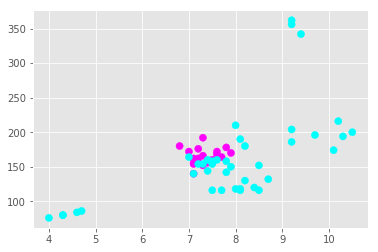

In [149]:
my_plot(dataset=df_frutas,criteria='apple', metric1='masa_fruta', metric2='altura_fruta')

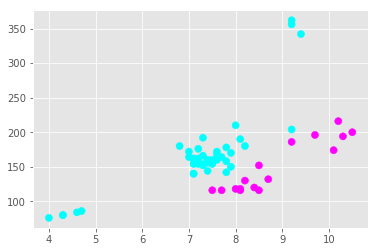

In [150]:
my_plot(dataset=df_frutas,criteria='lemon', metric1='masa_fruta', metric2='altura_fruta')

In [61]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Regressión logística

In [63]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.68
Accuracy of Logistic regression classifier on test set: 0.40


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision Tree

Usando los hiperparametros por defecto

In [198]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.47


In [192]:
DecisionTree_depth = 10

In [193]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = DecisionTree_depth)

In [194]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
y_predict = DecisionTreeModel.predict(X_test)

In [196]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.6

In [197]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=feature_names,impurity=False,class_names=frutas_lista,filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

0

Desplegamos la imagen del árbol con las siguiente instrucción:

    <img src='simple_tree.png' width = 1000px> 

<img src='simple_tree.png' width = 1000px>

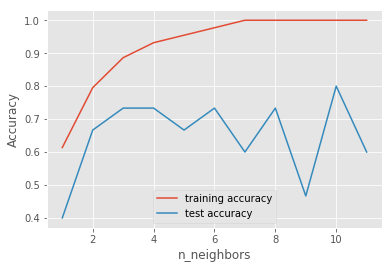

In [191]:
training_accuracy = []
test_accuracy = []

tree_settings = range(1, 12)
for DecisionTree_depth in tree_settings:
    # se construye el modelo de clasificacion
    DecisionTreeModel = DecisionTreeClassifier(max_depth = DecisionTree_depth)
    DecisionTreeModel.fit(X_train,y_train)  
    
    training_accuracy.append(accuracy_score(y_train,DecisionTreeModel.predict(X_train)))
    # se almacena la "generalization accuracy"
    test_accuracy.append(accuracy_score(y_test,DecisionTreeModel.predict(X_test)))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Se observe que el decisiontree aparente tener el mejor rendimiento para una profundidad de 10

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [153]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [154]:
y_predict = RandomForestModel.predict(X_test)

In [155]:
rf = accuracy_score(y_test,y_predict)
rf

0.4

In [157]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=feature_names,impurity=False,class_names=frutas_lista,filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])

0

<img src='complete_tree.png' width = 1000px>

In [158]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [159]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [160]:
importances.head(9)

,importance
feature,
altura_fruta,0.359487
ancho_fruta,0.336025
masa_fruta,0.304488


# KNN

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.60


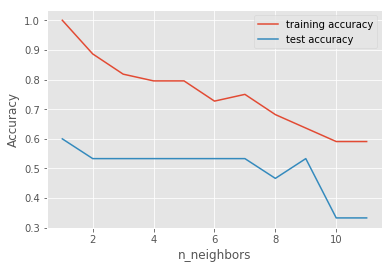

In [187]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

De momento con k=5 se observe el mejor rendimiento usando un KNN

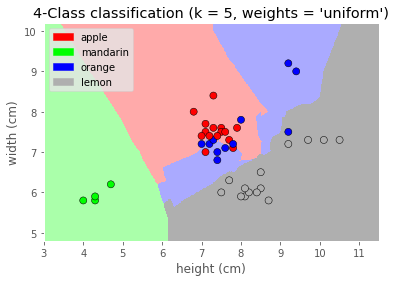

In [184]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['altura_fruta', 'ancho_fruta']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

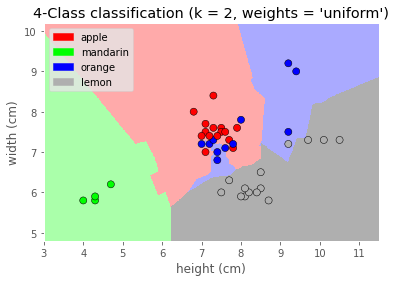

In [200]:
plot_fruit_knn(X_train, y_train, 2, 'uniform')

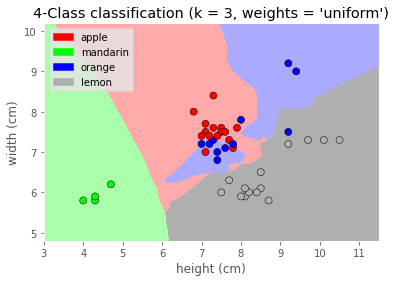

In [201]:
plot_fruit_knn(X_train, y_train, 3, 'uniform')

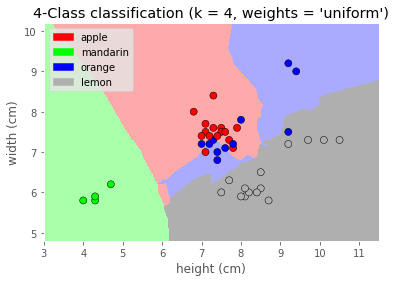

In [202]:
plot_fruit_knn(X_train, y_train, 4, 'uniform')

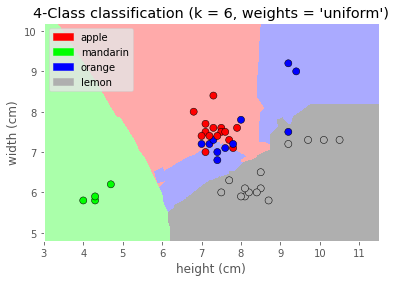

In [203]:
plot_fruit_knn(X_train, y_train, 6, 'uniform')

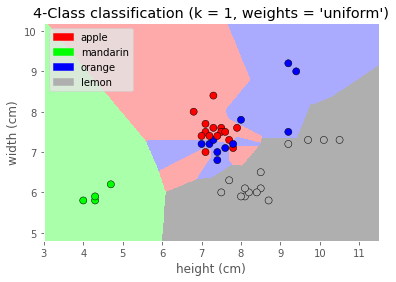

In [204]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

# LDA

In [72]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.73


# Gaussian Naive Bayes

In [74]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.60


# Resumen

| Método | Resultado training | Resultado testing |
| --- | --- | --- |
| Gaussian Naive Bayes | 0.82 | 0.6 |
| LDA | 0.86 | 0.73 |
| decisiontree | ~1 | 0.8 |
| KNN | ~0.8 | ~0.55 |

Al parecer el árbol decisión muestre el mejor rendimiento probablemente por la baja densidad de datos. Es mejor conseguir un set de datos más grandes pero la disponibilidad está limitada